# YOLOv4 VMMR Implementation

### Group Details<br>
**Team:** MA_A_10<br>
**Members:** Chan Kah Hee, Tan Weihan, Wong Jun Kang<br>
**Supervisor:** Dr Lim Mei Kuan, Dr Chong Chun Yong, Dr Khaw Hui Ying<br>
**Topic:** Vehicle Make and Model Recognition System Using Deep Learning<br>

### Cloning and Building Darknet

Clone darknet from AlexeyAB's YOLOv4 repository.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Enabling OPENCV, GPU, CUDNN and CUDNN_HALF in the makefile

In [1]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/home/jkwong/VMMR/darknet


Verify Cuda Versions

In [2]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Wed_Jun__2_19:15:15_PDT_2021
Cuda compilation tools, release 11.4, V11.4.48
Build cuda_11.4.r11.4/compiler.30033411_0


Make/Build the darknet executable.
You can ignore the warnings when running the '!make' cell

In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

### Download pre-trained YOLOv4 weights (For Testing purposes)
YOLOv4 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv4 on these pretrained classes and get detections.

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

### Define Helper Function

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections.

In [4]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Training YOLOv4 Custom VMMR Object Detector

Train Custom VMMR Detector with custom dataset

To create a custom YOLOv4 detector we will need to do the following:

*   Data labelling
*   Setting up Custom .cfg file and tuning of hyperparameters
*   Setting up obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)

### Labelling of Data with LabelImg

The custom dataset is manually annotated:

There are approximately **180 images** for each car models and **30 popular** car models in Malaysia.

For each model with **180 images** the car model consists of:
- 60 Frontal car angle
- 60 Left-Front angle
- 60 Right-Front angle

LabelImg is used as the labelling application for our custom VMMR detector.


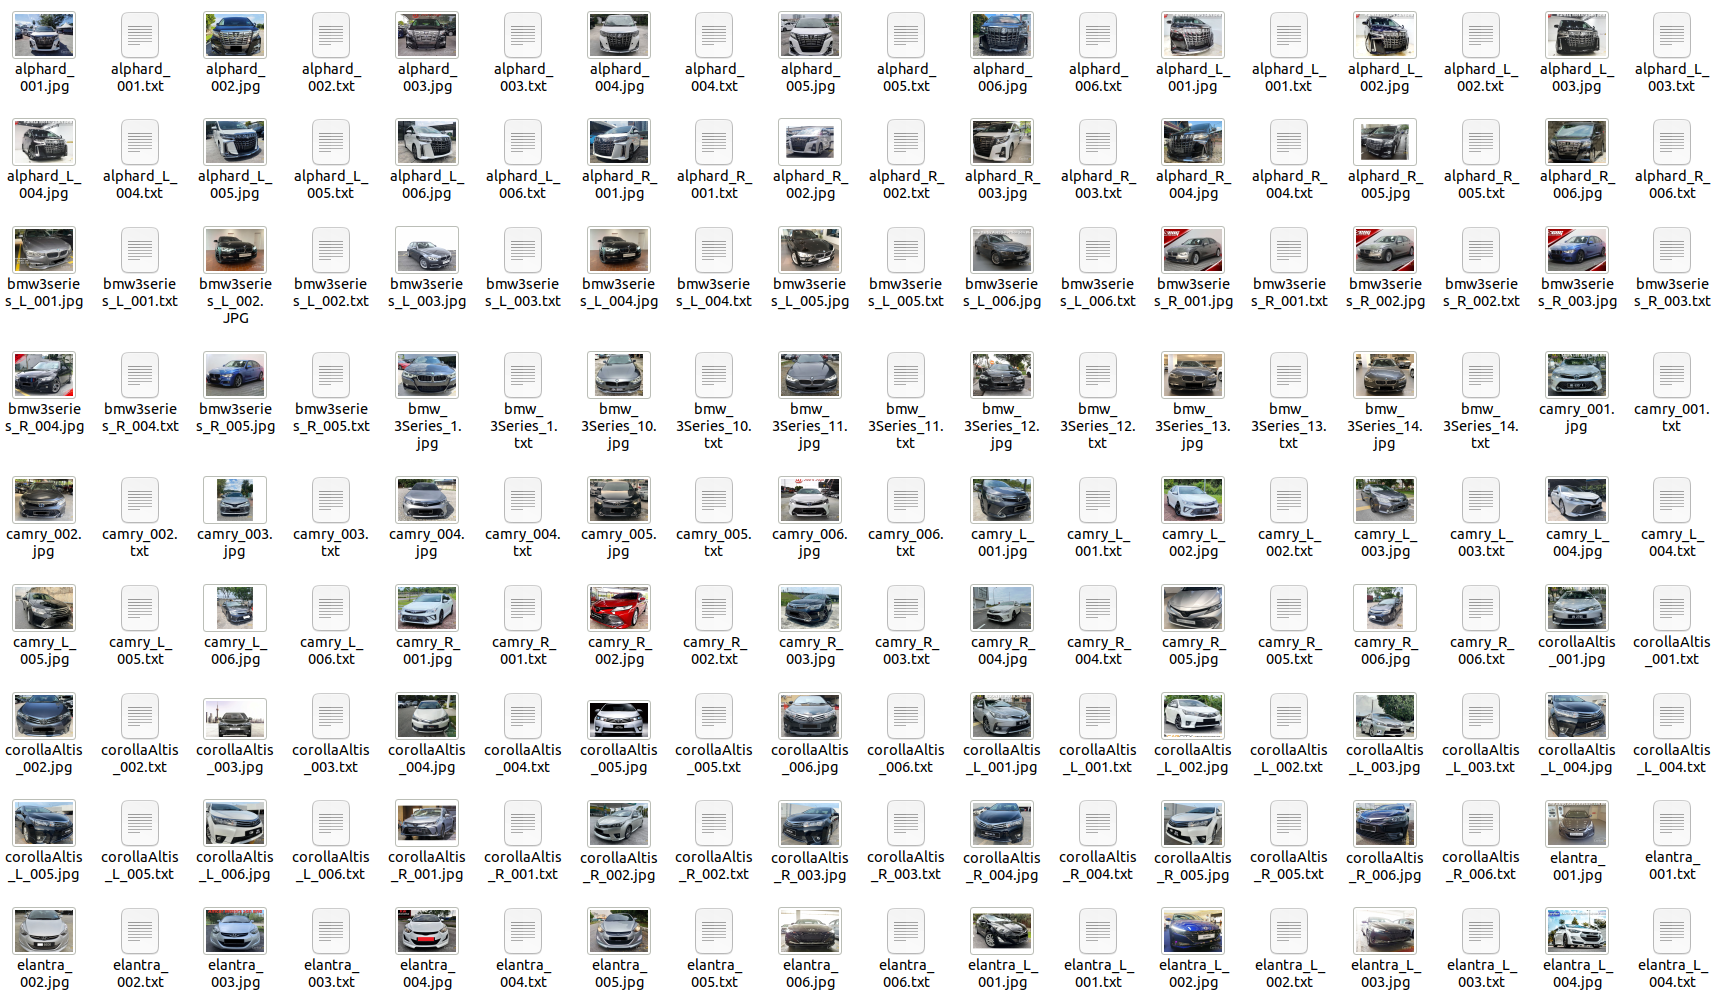

### Setting up obj.data and obj.names file

The labels in YOLOv4 is formatted as follows:

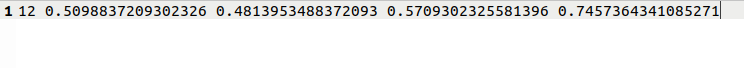

First we will need to set up the **obj.data** file in the following format:

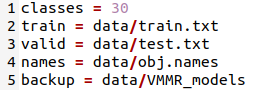

The following sections describes each of the variables in the obj.data file.

- **classes** : Number of models in our VMMR object detection model
- **train**   : File Path to the train.txt file where the train.txt file contains the path to all of the training set.
- **valid**   : File Path to the test.txt file where the test.txt file contains the path to all of the validation set.
- **names**   : Contains the naming format for the labels.
- **backup**  : location where the model weight files will saved to. 

Then, we will set up another file called **obj.names** in the following format for YOLOv4 to look up for their corresponding classes.

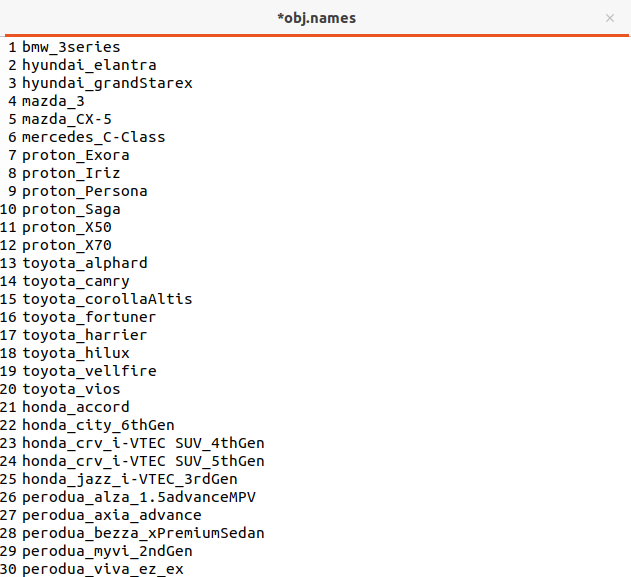

Such that, the first position in the obj.names file coresponds to index 0 of the labelled file and last position of the obj.names file corresponds to index 29 of the labelled file. For instance, Toyota_alphard (line 13) corresponds to index 12 of the labelled file.

### Cfg File- Tuning Hyperparameters

yolo-obj.cfg file are created (based on yolo-custom.cfg with minor modifications)

The Hyperparameters are tuned according to the YOLOv4 recommendation settings as documented in the repository. The conditions and calculation for the Hyperparameters settings are shown below.

##### Settings recommendations for the YOLOv4 configuration file from AlexeyAB Darknet repository:

- change line batch to batch=64
- change line subdivisions to subdivisions=16
- change line max_batches to (classes*2000, but not less than number of training images and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
- change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
- set network size width=416 height=416 or any value multiple of 32
- change line classes=80 to your number of objects in each of 3 [yolo]-layer.
- when using [Gaussian_yolo] layers, change [filters=57] filters=(classes + 9)x3 in the 3 [convolutional] before each [Gaussian_yolo] layer.
- So if classes=1 then should be filters=18. If classes=2 then write filters=21. (Do not write in the cfg-file: filters=(classes + 5)x3) for all [yolo]-layers
- optimized memory allocation during network resizing when random=1

##### The table below summarizes the hyperparameter/configuration settings used for the model training.

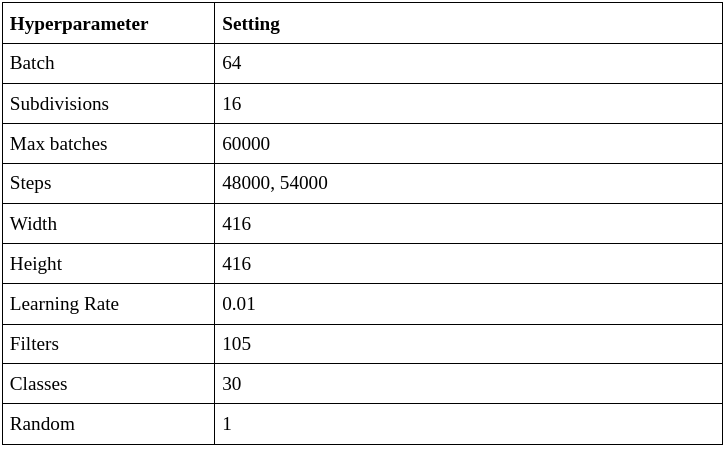

Other hyperparameter settings are kept as default settings as in yolo-custom.cfg file.

### Training, Testing and Validation.

The ratio used for training, testing and validation are 8:1:1 respectively.
        
The data are splitted externally using python scripts. view_here

Then, the data of training and validation set put into the corressponding path as specified in the obj.data (We can also adjust the path in the obj.data to match the path we put our training and testing data)

### Generating train.txt, test.txt and unseen_test.txt
The train.txt, test.txt and unseen_test.txt files which hold the relative paths to all our training images and valdidation images and unseen test images are then ran to generate a lookup text file accordingly. 

Note that: generate_train.py, generate_test.py, generate_unseen_test.py are placed in the darknet repository so it can be ran directly.

The python scripts are referenced/cited from: [Github Repo](https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)

In [8]:
# Generate their corressponding 
!python3 generate_train.py
!python3 generate_test.py
!python3 generate_unseen_test.py

# Verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

The image below shows the format of one of the following generated file (train.txt):

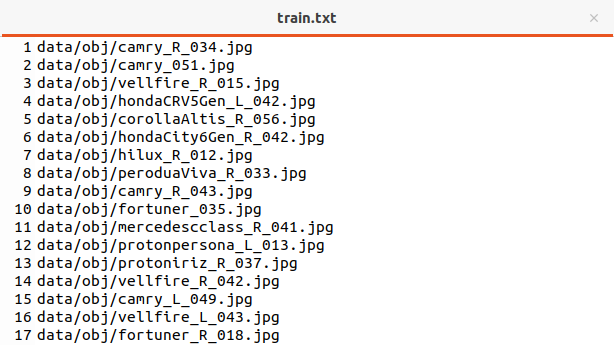

The text ile contains file path to look up for the training images

### Download pre-trained weights for the convolutional layers (Applying Transfer Learning)
Downloads the weights for the convolutional layers of the YOLOv4 network.

##### why? 
- To speeds up the training process
- To improve the accuracy of our model

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### Train the VMMR model won top of the pretrained weight

The following command is ran to train our custom VMMR model on top of the pre-trained weight file.
```
!./darknet detector train <path to obj.data> <path to custom config> yolov4.conv.137 -dont_show -map
```
-map flag (overlays mean average precision) is added as a validation set is available.

In [ ]:
%%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

### Kickoff training from the last weight file:

The following command is useful when the program crashes when we wanted to continue to train the model from the latest weight file

In [ ]:
%%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg data/VMMR_models/yolov4-obj_last.weights -dont_show

### Plotting Graph of Average Loss vs Iteration

This command allow us to plot a graph of average loss vs iteration which allow us to observe the performance of our model and make adjustments in hyperparameters accordingly. Additionally, we can decide to stop the training based on how our model performed against the validation set. The diagram below shows the graph plotted in one of our attempts. The red line indicate the mean average precision tested on the validation set. We can stop the training at the "early point" to prevent overfitting of data. A fully plotted graph will only be plotted with uninterrupted training.

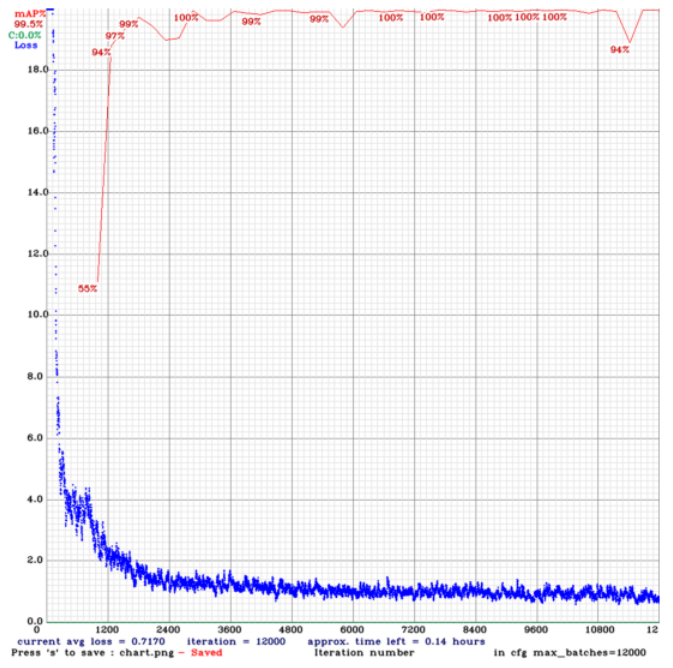

In [9]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

### Testing Mean Average Precision (mAP) of the VMMR Model

Multiple weight files are produced in the process of model training, we can select and test on one of the following weight files and observe their performance.
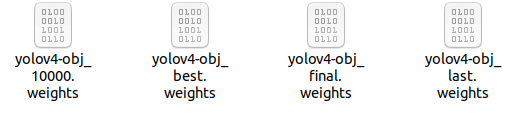

Before running the test, we would first change the variable "valid" of obj.data into from "valid = test.txt" to "valid = unseen_test.txt" to test our model on unseen data to avoid bias.
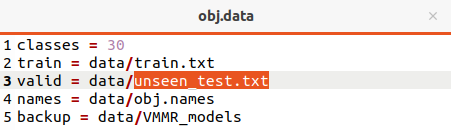

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg data/VMMR_models/yolov4-obj_best.weights

### Running the VMMR Object Detector on Images or Videos

In [ ]:
# need to set our cfg file to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

#### Image Detection

In [ ]:
# test the VMMR model on images
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg data/VMMR_models/yolov4-obj_best.weights data/testing_images/bmw_3_01.jpg -thresh 0.8
imShow('predictions.jpg')

#### Frame rate testing and Video detection

The following line of code will generated a labelled video file based on the weight file selected and output a processed labelled video from the input video.  Additionally, this line of code will show the average FPS when performing detections, hence, the performance on frame per second can be tested accordingly.

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg data/VMMR_models/yolov4-obj_best.weights -dont_show data/testing_videos/perodua_axia.mp4 -thresh 0.8 -out_filename fold3.mp4